In [ ]:
#Este arquivo contém o exemplo apresentado na aula Identificação de Padrões em Dados IoT

In [1]:
!pip install matplotlib==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.8.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.7.3 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.


In [ ]:
#comando utilizado para importar os dados (dataset) para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
#importando as bibliotecas
import numpy as np  #utilizada para tratar dados vetoriais e numericos
import pandas as pd  #utilizada para tratar os dataframes
import matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"

In [ ]:
#lendo o dataset no formato de um dataframe através da função read do pandas
nomeArquivo = 'winequality-red.csv' 
dfQualidadeVinhos = pd.read_csv(nomeArquivo, sep=';')

In [ ]:
#conhecendo o banco de dados
dfQualidadeVinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#print das 5 primeiras linhas do dataframe
dfQualidadeVinhos.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbde528470>,
      dtype=object)

<Figure size 1000x1000 with 0 Axes>

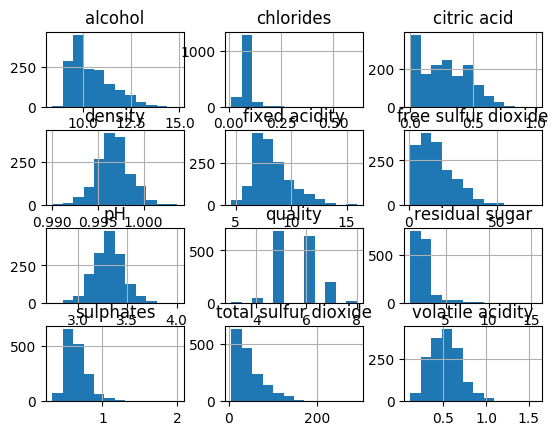

In [ ]:
#Plot do histograma
plt.style.use('default') #define o formato a ser exibido para os gráficos
plt.figure(figsize=(10,10))  #definindo o tamanho das figuras
dfQualidadeVinhos.hist(bins=12)  #realizando o plot do histograma

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.39055

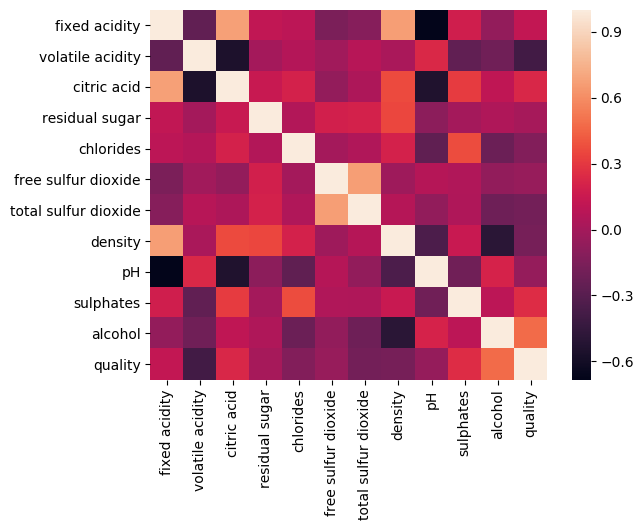

In [ ]:
# procurando por correlações
matriz_correlacao= dfQualidadeVinhos.corr() #encontra a matriz de correlação
print(matriz_correlacao) #print da matriz de correlação
sns.heatmap(matriz_correlacao) #realiza o plot da matriz de correlação através da função heatmap

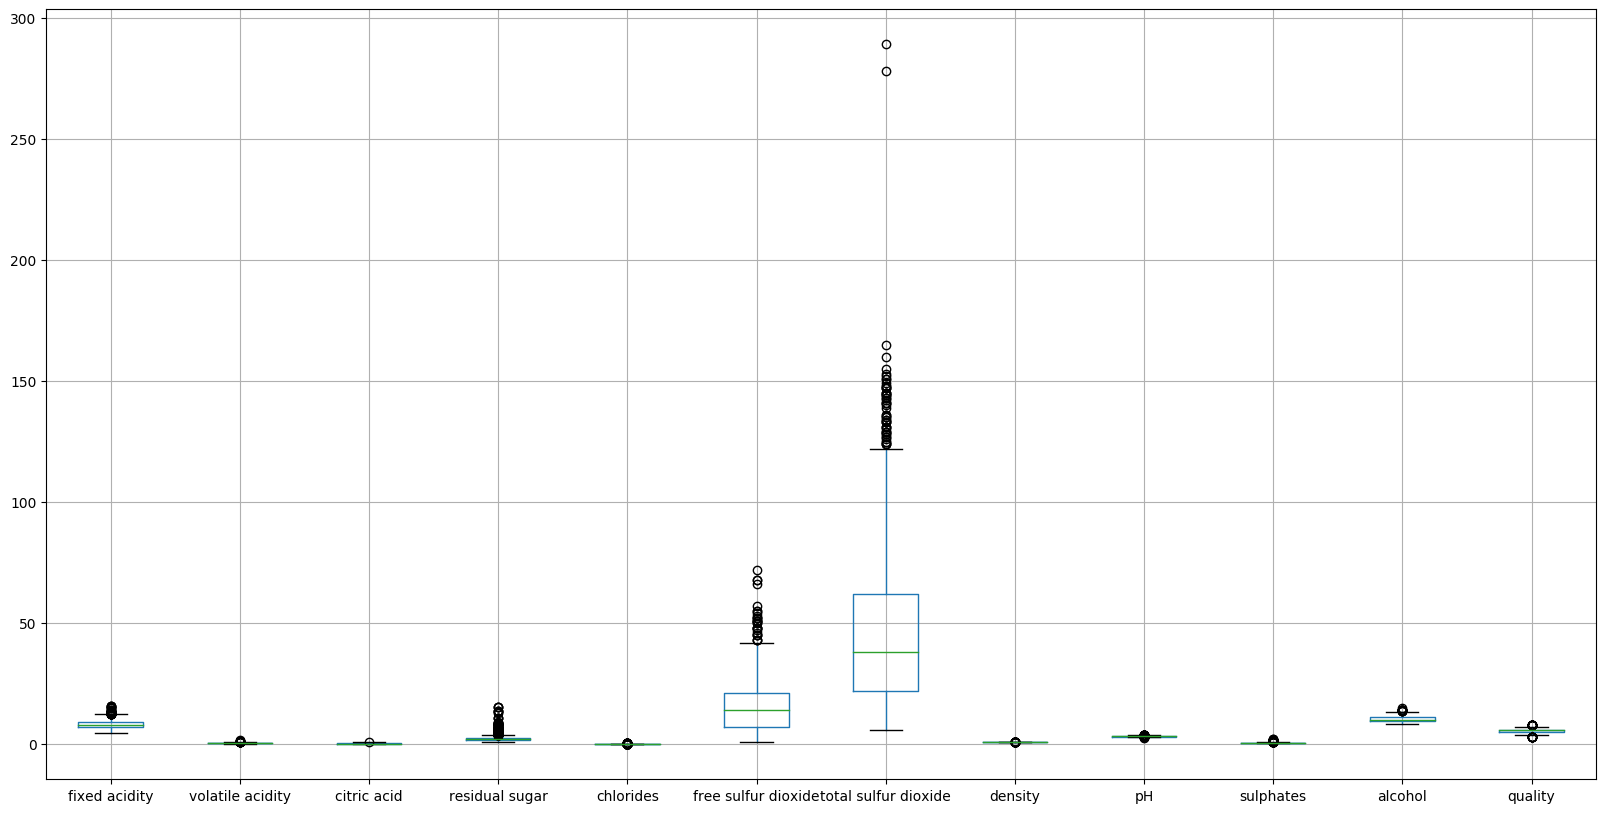

In [ ]:
#encontrando outliers
plt.figure(figsize=(20,10))  #definindo o tamanho das figuras
dfQualidadeVinhos.boxplot() #realiza o boxplot dos dados

In [ ]:
# categoriza os vinhos entre bons e ruins
bins = (0,5.5,10) #define os limiares para as categorias
categorias = pd.cut(dfQualidadeVinhos['quality'], bins, labels = ['ruim','bom'])
dfQualidadeVinhos['quality_2'] = categorias

In [ ]:
dfQualidadeVinhos.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bom
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ruim


In [ ]:
#realizando o preprocessamento
X = dfQualidadeVinhos.drop(['quality','quality_2'], axis = 1) #encontra os valores para a entrada
scaler = MinMaxScaler() #objeto utilizado para colocar os dados em uma mesma escala
X_new = scaler.fit_transform(X) #aplica a transformação para deixar os dados em uma mesma escala
y = dfQualidadeVinhos['quality_2'] #encontra os valores para a saída (target)


In [ ]:
X.head(5) #entrada em diferentes escalas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
X_new #entradas normalizadas (mesma escala)

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [ ]:
y #saída sem codificação

0       ruim
1       ruim
2       ruim
3        bom
4       ruim
        ... 
1594    ruim
1595     bom
1596     bom
1597    ruim
1598     bom
Name: quality_2, Length: 1599, dtype: category
Categories (2, object): [ruim < bom]

In [ ]:
# transformação dos dados categóricos em numéricos
labelencoder_y = LabelEncoder() #objeto para aplicar o codificação das diferentes classes
y = labelencoder_y.fit_transform(y) #aplica a codificação

In [ ]:
y #saída após codificação

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
#divide os dados entre treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 323) #aplica a função que divide o dataset

In [ ]:
#classificação dos dados por meio do nayve bayes
classifier = GaussianNB() #objeto para a classificador 
classifier.fit(X_train, y_train) #aplica o treinamento para o classificador


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Realiza a previsão (dados de teste)
y_pred = classifier.predict(X_test)

In [ ]:
# encontra a acurácia do modelo
print(accuracy_score(y_test, y_pred))

0.7125


In [ ]:
matrix_confusao=confusion_matrix(y_test, y_pred) #constroi a matriz de confusão
print(matrix_confusao)

[[120  45]
 [ 47 108]]


Text(0.5, 1, 'Matriz de Confusao')

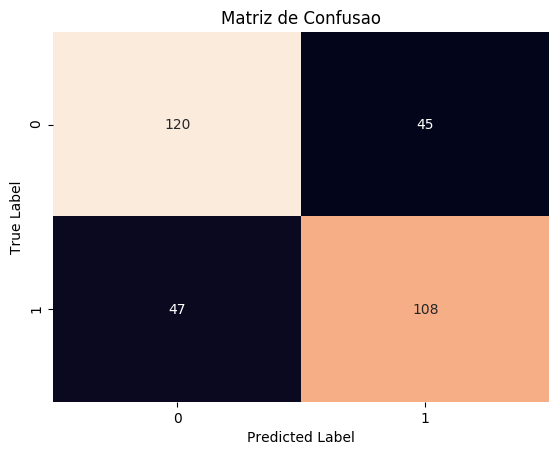

In [ ]:
#plt.ticklabel_format(style='plain')
sns.heatmap(matrix_confusao,annot=True,cbar=False,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusao')
